
🔎 Processing file: ADANIPORTS.csv
📉 Mean Squared Error: 126.77
📈 R² Score: 0.99


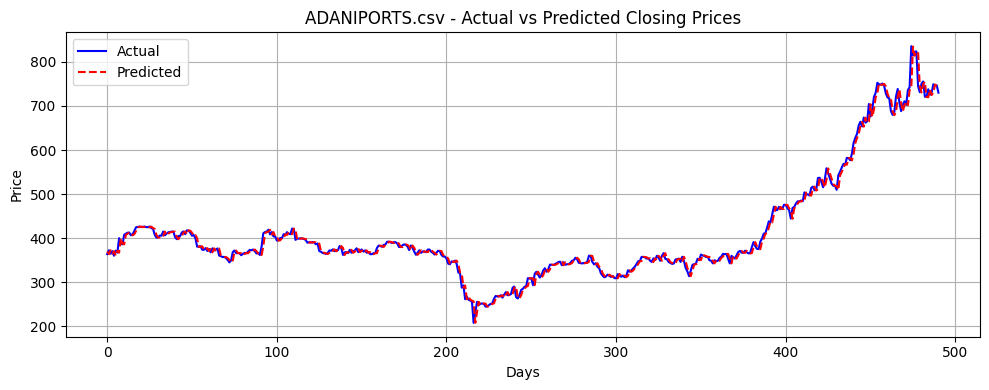

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

folder_path = "/content/sample_data/stock dataset"
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in file_list:
    print(f"\n🔎 Processing file: {file}")
    df = pd.read_csv(os.path.join(folder_path, file))
    if 'Close' not in df.columns:
        print("❌ Skipping: 'Close' column not found.")
        continue
    df['Next_Close'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    if len(df) < 10:
        print(f"⚠ Skipping: Not enough data points ({len(df)} rows).")
        continue
    X = df[['Close']]
    y = df['Next_Close']
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    except ValueError as e:
        print(f"⚠ Skipping due to error in train_test_split: {e}")
        continue
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📉 Mean Squared Error: {mse:.2f}")
    print(f"📈 R² Score: {r2:.2f}")
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
    plt.title(f"{file} - Actual vs Predicted Closing Prices")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
